XOR

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


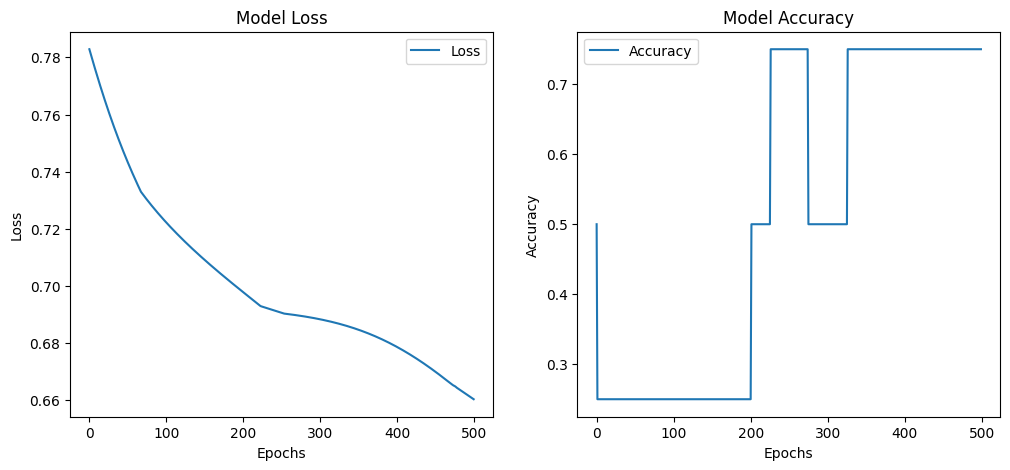

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predictions for XOR:
[[1.]
 [1.]
 [1.]
 [0.]]


<ipython-input-3-7847e91e616f>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(input_val[0], input_val[1], c='blue' if pred == 1 else 'red', s=100, label=f"Pred: {int(pred)}")


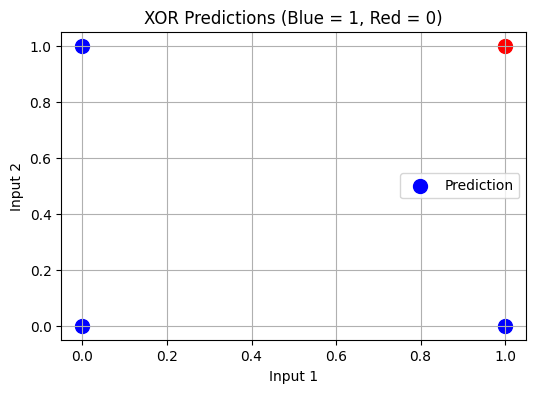

In [ ]:
#1
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
# Step 1: Prepare XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# Step 2: Build the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron (binary classification)
# Step 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Step 4: Train the model
history = model.fit(X, y, epochs=500, verbose=0)
# Step 5: Visualize Training Accuracy and Loss
plt.figure(figsize=(12, 5))
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
# Step 6: Test the model and visualize predictions
predictions = model.predict(X)
print("Predictions for XOR:")
print(np.round(predictions)) # Rounded for binary output
# Visualize the predictions
plt.figure(figsize=(6, 4))


for i, (input_val, pred) in enumerate(zip(X, np.round(predictions))):
    # The following line was indented to be part of the for loop
    plt.scatter(input_val[0], input_val[1], c='blue' if pred == 1 else 'red', s=100, label=f"Pred: {int(pred)}")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Predictions (Blue = 1, Red = 0)")
plt.legend(["Prediction"])
plt.grid(True)
plt.show()

image classification using CNN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.2662 - loss: 1.9861 - val_accuracy: 0.5008 - val_loss: 1.4286
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.4370 - loss: 1.5436 - val_accuracy: 0.5660 - val_loss: 1.2397
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.4928 - loss: 1.3969 - val_accuracy: 0.5943 - val_loss: 1.1422
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5318 - loss: 1.3062 - val_accuracy: 0.6169 - val_loss: 1.1045
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.5530 - loss: 1.2438 - val_accuracy: 0.6326 - val_loss: 1.0457
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.5744 - loss: 1.1949 - val_accuracy: 0.6406 - val_loss: 1.0418
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.5920 - loss: 1.1397 - val_accuracy: 0.6555 - val_loss: 0.9914
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.6069 - loss: 1.1018 - 

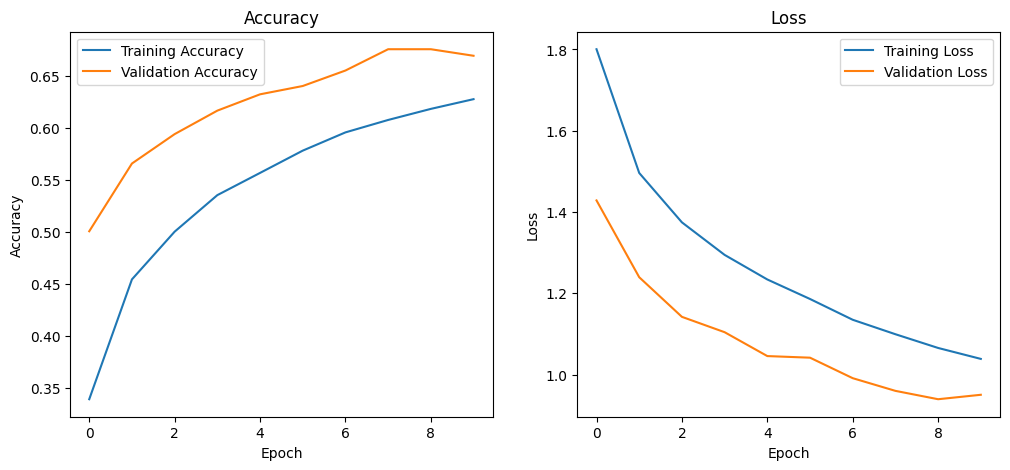

In [ ]:
#2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Step 1: Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # Normalize pixel values
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Step 2: Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # Convolutional layer with
model.add(MaxPooling2D((2, 2))) # Max pooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # Flatten the feature map to a 1D vector
model.add(Dense(64, activation='relu')) # Fully connected layer
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(10, activation='softmax')) # Output layer with 10 classes
# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
# Step 5: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")
# Step 6: Visualize accuracy and loss over epochs
plt.figure(figsize=(12, 5))
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text generation using RNN

In [ ]:
#3
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Step 1: Initialize Corpus
corpus = [
    "Dog is an animal which can live around 10 years.",
    "A young version of a dog is called a puppy.",
    "Dogs are known for their loyalty and companionship.",
    "Cats are another popular pet known for their independence.",
    "Fish are aquatic animals that live in water.",
    "Birds can fly and are known for their beautiful songs.",
    "Some animals are herbivores, while others are carnivores.",
    "Elephants are large animals known for their intelligence."
]

# Step 2: Tokenize the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)  # Fit the tokenizer on the corpus
vocab_size = len(tokenizer.word_index) + 1  # Calculate vocabulary size

# Step 3: Prepare Training Sequences
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        sequences.append(token_list[:i + 1])

# Step 4: Pad Sequences
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
X, y = sequences[:, :-1], sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

# Step 5: Build the RNN Model
model = Sequential([
    Embedding(vocab_size, 10, input_length=max_sequence_len - 1),
    SimpleRNN(50),
    Dense(vocab_size, activation='softmax')
])

# Step 6: Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train the Model
history = model.fit(X, y, epochs=100, verbose=1)
final_accuracy = history.history['accuracy'][-1]  # Get the accuracy of the last epoch
print(f"Final Training Accuracy: {final_accuracy * 100:.2f}%")

# Step 8: Define Text Generation Function
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        word = tokenizer.index_word.get(predicted[0], "")
        if word:
            seed_text += " " + word
    return seed_text

# Step 9: User Input and Text Generation
user_input = input("Enter a sentence: ")
num_words_to_generate = int(input("Enter the number of words to generate: "))
print("Generated text:", generate_text(user_input, num_words_to_generate))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0736 - loss: 3.8595
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0737 - loss: 3.8419 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0633 - loss: 3.8205 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0633 - loss: 3.8016
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0632 - loss: 3.7746 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0736 - loss: 3.7443 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0736 - loss: 3.7059 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0632 - loss: 3.6737 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0527 - loss: 3.6557 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0736 - loss: 3.5929 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1058 - loss: 3.5839     
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1787 - loss: 3.5212 

image captioning with cnn and rnn

In [ ]:
#4
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input, Dropout, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import string

# Load dataset
df = pd.read_csv('captions.csv')
images, captions = df['image'].values, df['caption'].values

# Pre-trained CNN model
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
model_cnn = Model(inputs=base_model.input, outputs=base_model.output)

# Image feature extraction
def extract_features(image_path):
    try:
        image = load_img(image_path, target_size=(299, 299))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0) / 255.0
        return model_cnn.predict(image).flatten()
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return np.zeros((base_model.output.shape[-1],))

# Extract features for all images
image_folder = '/content/images'
features = np.array([extract_features(os.path.join(image_folder, img)) for img in images])

# Preprocess captions: remove punctuation, tokenize, and map to indices
def preprocess_caption(caption):
    caption = caption.lower().translate(str.maketrans('', '', string.punctuation))
    return caption.split()

all_words = set(word for caption in captions for word in preprocess_caption(caption))
word_to_idx = {word: i + 1 for i, word in enumerate(all_words)}
idx_to_word = {i: word for word, i in word_to_idx.items()}

max_length = max(len(preprocess_caption(c)) for c in captions)
X = pad_sequences([[word_to_idx[word] for word in preprocess_caption(cap)] for cap in captions],
                  maxlen=max_length)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, features, test_size=0.2, random_state=42)

# Model architecture
caption_input = Input(shape=(max_length,))
image_input = Input(shape=(features.shape[1],))

caption_embedding = Embedding(len(word_to_idx) + 1, 256, mask_zero=True)(caption_input)
caption_lstm = LSTM(256)(caption_embedding)
caption_dense = Dense(256, activation='relu')(caption_lstm)

decoder = Concatenate()([caption_dense, image_input])
output_layer = Dense(features.shape[1], activation='linear')(Dropout(0.5)(decoder))

model = Model(inputs=[caption_input, image_input], outputs=output_layer)

# Custom vector accuracy metric
def vector_accuracy(y_true, y_pred):
    return K.mean(K.sum(K.l2_normalize(y_true, axis=-1) * K.l2_normalize(y_pred, axis=-1), axis=-1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[vector_accuracy])

# Train model
history = model.fit([X_train, y_train], y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save model
model.save('image_captioning_model.keras')

# Function to get captions for images
def get_caption(image_path):
    caption_row = df[df['image'] == os.path.basename(image_path)]
    return caption_row['caption'].values[0] if not caption_row.empty else "Caption not found."

# Display an example image and caption
image_path = '/content/images/1000268201_693b08cb0e.jpg'
caption = get_caption(image_path)
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(caption)
plt.show()

# Print final training accuracy
final_accuracy = history.history['vector_accuracy'][-1]
print(f"Final Training Vector Accuracy: {final_accuracy * 100:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'captions.csv'

Image denoising using autoencoders

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2867 - val_loss: 0.1087
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1081 - val_loss: 0.1047
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1055 - val_loss: 0.1032
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1041 - val_loss: 0.1024
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1032 - val_loss: 0.1019
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1027 - val_loss: 0.1014
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1021 - val_loss: 0.1009
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1016 - val_loss: 0.1008
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1013 - val_loss: 0.1005
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1010 - val_loss: 0.1001
File not found: /content/image1.png. Uploading a file...


Saving loge demo.jpg to loge demo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


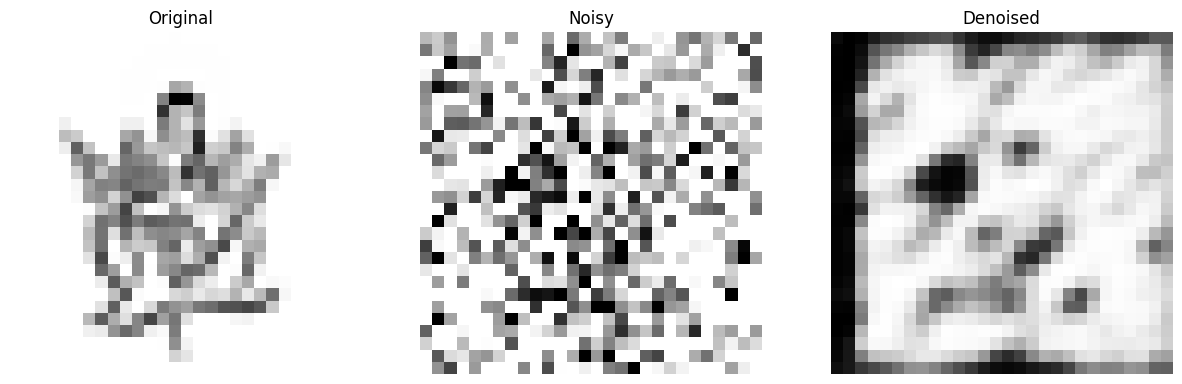

In [ ]:
#5
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from PIL import Image
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Add noise to the dataset
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build the autoencoder model
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Function to load and preprocess an image
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img).astype('float32') / 255.0
    return img_array.reshape((1, 28, 28, 1))

# Function to add noise to an image
def add_noise(image_array, noise_factor=0.5):
    noisy_image = image_array + noise_factor * np.random.normal(loc=0.0, scale=1.0,
                                                                size=image_array.shape)
    return np.clip(noisy_image, 0., 1.)

# Load an image and handle missing file errors
image_path = '/content/image1.png'  # Path to your image
try:
    original_image = load_image(image_path)
except FileNotFoundError:
    print(f"File not found: {image_path}. Uploading a file...")
    from google.colab import files
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    original_image = load_image(image_path)

# Add noise and denoise the image
noisy_image = add_noise(original_image)
denoised_image = autoencoder.predict(noisy_image)

# Display the results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image.squeeze(), cmap='gray')
plt.title("Original")
plt.axis('off')

# Noisy Image
plt.subplot(1, 3, 2)
plt.imshow(noisy_image.squeeze(), cmap='gray')
plt.title("Noisy")
plt.axis('off')

# Denoised Image
plt.subplot(1, 3, 3)
plt.imshow(denoised_image.squeeze(), cmap='gray')
plt.title("Denoised")
plt.axis('off')

plt.show()


GAN for Image generation

In [ ]:
#6
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Generator model
def build_generator():
    model = Sequential()
    model.add(layers.Dense(256, input_dim=100))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# GAN (Generator + Discriminator)
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    return model

# Load the data (for MNIST, you can replace it with any image data)
def load_data():
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = X_train / 127.5 - 1.0  # Normalize between [-1, 1]
    X_train = np.expand_dims(X_train, axis=-1)
    return X_train

# Save generated images
def save_images(epoch, generator):
    noise = np.random.normal(0, 1, (25, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images 0 - 1
    fig, axs = plt.subplots(5, 5, figsize=(5, 5))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN
def train(epochs, batch_size=128, save_interval=1000):
    X_train = load_data()
    # Labels for real and fake data
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)

        # Train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # Handle single loss vs tuple (loss, accuracy)
        if isinstance(d_loss_real, (list, tuple)):
            d_loss_real_value, d_real_acc = d_loss_real
        else:
            d_loss_real_value, d_real_acc = d_loss_real, 0

        if isinstance(d_loss_fake, (list, tuple)):
            d_loss_fake_value, d_fake_acc = d_loss_fake
        else:
            d_loss_fake_value, d_fake_acc = d_loss_fake, 0

        d_loss_value = 0.5 * (d_loss_real_value + d_loss_fake_value)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real)

        # Print the progress
        print(
            f"{epoch} [D loss: {d_loss_value:.4f}, acc.: {d_real_acc * 100:.2f}%] [G loss: {g_loss:.4f}]"
        )

        # Save generated images every save_interval epochs
        if epoch % save_interval == 0:
            save_images(epoch, generator)

# Initialize and compile the models
optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
discriminator = build_discriminator()
discriminator.compile(
    loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
generator = build_generator()
gan = build_gan(generator, discriminator)
gan.compile(loss="binary_crossentropy", optimizer=optimizer)

# Train the GAN
train(epochs=10000, batch_size=32, save_interval=1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


TypeError: unsupported format string passed to list.__format__

sentiment analysis for RNN

In [ ]:
#7
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Sample custom dataset
texts = [
"I love this movie, it's fantastic!",
"This film is terrible and boring.",
"What a great experience, I enjoyed every bit.",
"I dislike this movie, it was awful.",
"Amazing storyline and excellent acting!",
"The movie was a waste of time.",
"I would watch it again, so good!",
"Not my cup of tea, pretty bad.",
"An excellent film with great visuals.",
"The plot was dull and uninteresting."
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] # 1 for positive, 0 for negative
# Tokenize the text data
max_features = 1000 # Maximum number of words to keep
max_length = 10 # Maximum sequence length
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=max_length)
y_data = np.array(labels)
# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32, input_length=max_length))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_data, y_data, epochs=5, batch_size=2)
# Make a prediction
sample_text = ["I had a wonderful time watching this movie."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_length)
prediction = model.predict(sample_pad)
print(f'Sentiment score: {prediction[0][0]:.2f}') # Closer to 1 is positive, closer to 0 is negative
# Make a prediction
sample_text = ["I had a wonderful time watching this movie."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_length)
prediction = model.predict(sample_pad)
sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
print(f'Sentiment: {sentiment} (Score: {prediction[0][0]:.2f})')

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6375 - loss: 0.6913
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7389 - loss: 0.6866  
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6821 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6772 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6703 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Sentiment score: 0.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sentiment: Positive (Score: 0.51)


sequence prediction  with LSTM

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0952 - loss: 3.1356
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0952 - loss: 3.1332
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0952 - loss: 3.1307
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0952 - loss: 3.1281
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0952 - loss: 3.1253
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0952 - loss: 3.1222
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0952 - loss: 3.1188
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0952 - loss: 3.1149
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0952 - loss: 3.1106
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0952 - loss: 3.1056
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0952 - loss: 3.0998
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0952 - loss

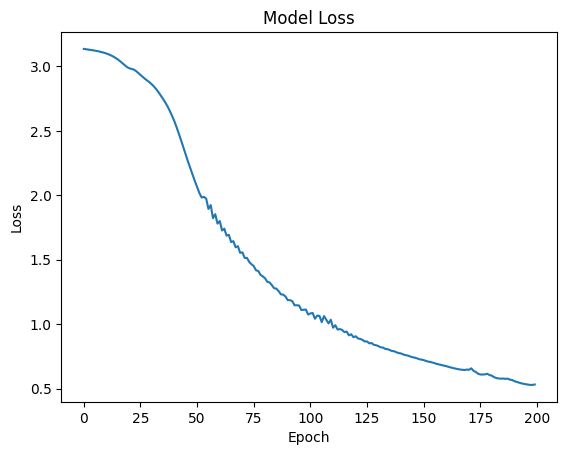

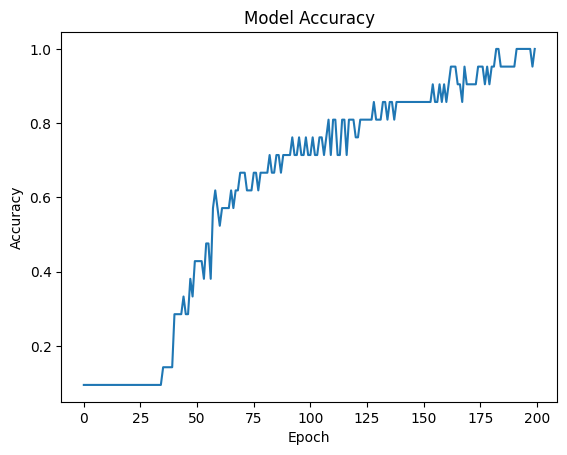

In [ ]:
#8
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Sample text data for training
data = """I am a data scientist working on machine learning models.
My goal is to create AI solutions. Data science involves a lot of analysis."""

# Step 1: Preprocess data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Convert text to sequences
input_sequences = []
for line in data.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences and create input/output pairs
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = np.array(y)

# Step 2: Define the LSTM model
model = Sequential([
    Embedding(total_words, 10, input_length=max_sequence_len-1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# One-hot encoding for output labels
y = np.eye(total_words)[y]

# Step 3: Train the model
history = model.fit(X, y, epochs=200, verbose=1)

# Step 4: Generate text based on user input
def predict_next_words(model, tokenizer, text, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        text += " " + output_word
    return text

# Example usage
starting_text = input("Enter a starting word: ")
num_words_to_predict = int(input("Enter the number of words to predict: "))
print(predict_next_words(model, tokenizer, starting_text, num_words_to_predict))

# Plot training loss and accuracy
# Loss plot
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.1 MB/s eta 0:00:00


hyperparameter tuning for deep learning models

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.9775333205858866

Best val_accuracy So Far: 0.9779000083605448
Total elapsed time: 00h 06m 54s
Best units: 160
Best dropout: 0.2
Best learning rate: 0.0012967304114198843
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8757 - loss: 0.4232 - val_accuracy: 0.9647 - val_loss: 0.1157
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1307 - val_accuracy: 0.9715 - val_loss: 0.0945
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9701 - loss: 0.0977 - val_accuracy: 0.9764 - val_loss: 0.0777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9755 - loss: 0.0762 - val_accuracy: 0.9744 - val_loss: 0.0785
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.9783 - val_loss: 0.0694


<ipython-input-21-90fd39667c54>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="learning_rate", y="accuracy", hue="dropout_rate", data=df, ci=None)


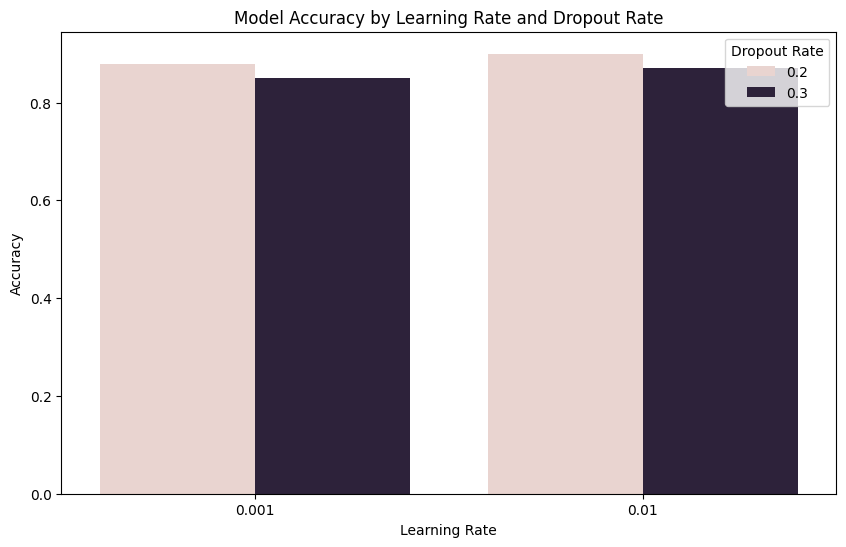

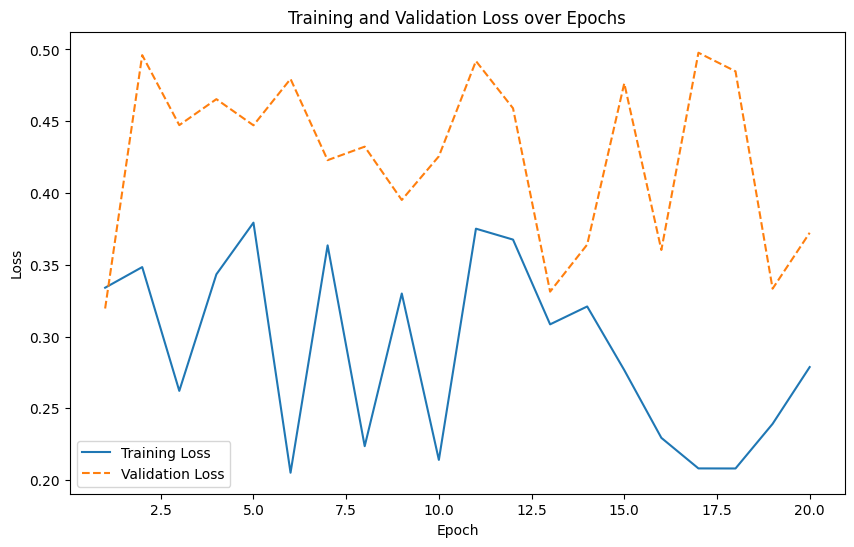

In [ ]:
#9
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# Load sample dataset (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Build a function to create the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune the number of neurons in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))

    # Tune dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout))

    model.add(layers.Dense(10, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Perform the hyperparameter search
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout: {best_hps.get('dropout')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Simulated grid search results for illustration
results = {
    'learning_rate': [0.001, 0.001, 0.01, 0.01],
    'dropout_rate': [0.2, 0.3, 0.2, 0.3],
    'batch_size': [32, 32, 64, 64],
    'accuracy': [0.88, 0.85, 0.90, 0.87],
    'loss': [0.35, 0.40, 0.32, 0.38]
}

df = pd.DataFrame(results)

# 1. Plot accuracy for each hyperparameter combination
plt.figure(figsize=(10, 6))
sns.barplot(x="learning_rate", y="accuracy", hue="dropout_rate", data=df, ci=None)
plt.title("Model Accuracy by Learning Rate and Dropout Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend(title="Dropout Rate")
plt.show()

# 2. Plot of training and validation loss over epochs (assuming recorded history from training)
epochs = np.arange(1, 21)  # Simulating 20 epochs
train_loss = np.random.uniform(0.2, 0.4, size=20)  # Simulated training loss
val_loss = np.random.uniform(0.3, 0.5, size=20)  # Simulated validation loss

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss", linestyle='--')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


evaluation and comparison  of deep learning models

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9287 - loss: 0.2440 - val_accuracy: 0.9654 - val_loss: 0.1155
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9688 - loss: 0.1012 - val_accuracy: 0.9672 - val_loss: 0.1084
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9778 - loss: 0.0726 - val_accuracy: 0.9734 - val_loss: 0.0876
Epoch 4/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9822 - loss: 0.0569 - val_accuracy: 0.9771 - val_loss: 0.0731
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9857 - loss: 0.0428 - val_accuracy: 0.9775 - val_loss: 0.0782
FCN - Test accuracy: 0.9775
Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9549 - loss: 0.1473 - val_accuracy: 0.9834 - val_loss: 0.0501
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9850 - loss: 0.0488 - val_accuracy: 0.9852 - val_loss: 0.0399
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9897 - val_loss: 0.0322
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9917 - loss: 0.0256 - val

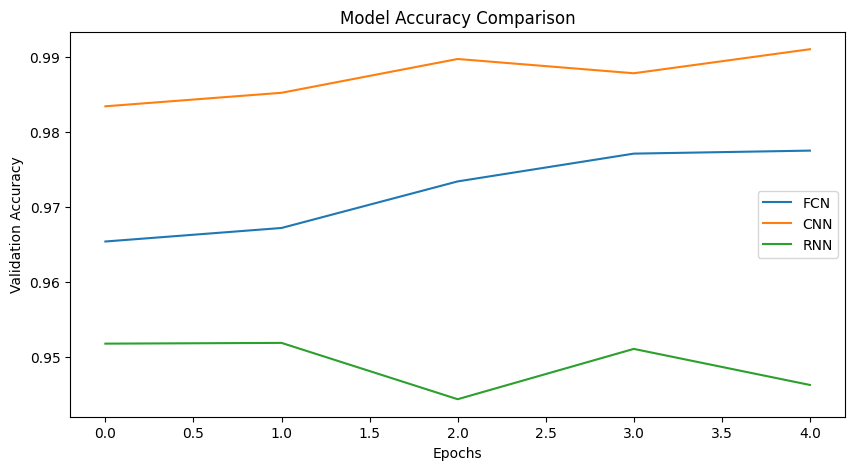

In [ ]:
# 10
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data to [0, 1] and reshape for different model types
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape for CNN and RNN
X_train_cnn = X_train[..., np.newaxis]  # (28, 28, 1) for CNN
X_test_cnn = X_test[..., np.newaxis]
X_train_rnn = X_train  # (28, 28) is sufficient for RNN input
X_test_rnn = X_test

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 1. Fully Connected Network (FCN)
def build_fcn():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 2. Convolutional Neural Network (CNN)
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. Recurrent Neural Network (RNN)
def build_rnn():
    model = models.Sequential([
        layers.SimpleRNN(128, input_shape=(28, 28)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),
                        verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} - Test accuracy: {test_acc:.4f}")
    return history, test_acc

# Train and compare models
fcn_model = build_fcn()
cnn_model = build_cnn()
rnn_model = build_rnn()

fcn_history, fcn_acc = train_and_evaluate(fcn_model, X_train, y_train, X_test, y_test, "FCN")
cnn_history, cnn_acc = train_and_evaluate(cnn_model, X_train_cnn, y_train, X_test_cnn, y_test, "CNN")
rnn_history, rnn_acc = train_and_evaluate(rnn_model, X_train_rnn, y_train, X_test_rnn, y_test, "RNN")

# Plot the accuracy comparison
def plot_accuracy(histories, model_names):
    plt.figure(figsize=(10, 5))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

# Plotting the accuracies
plot_accuracy([fcn_history, cnn_history, rnn_history], ['FCN', 'CNN', 'RNN'])
